# Лабораторная работа №3. 

#  Занятие 3. Кратковременное дискретное преобразование Фурье



In [43]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [44]:
%matplotlib inline

In [45]:
plt.rc('font', size=12) 
import warnings
warnings.filterwarnings('ignore')

## Кратковременное дискретное преобразование Фурье (STFT)

Кратковременное дискретное преобразование Фурье (Discrete  STFT, англ. Discrete Short-time Fourier transform) может задаваться формулой
$${{X}_{m}}[n]=\sum\limits_{k=mR}^{mR+M-1}{x}[k]w[k-mR]\exp \left( -j2\pi \frac{nk}{{{N}_{\text{FFT}}}} \right),$$
где 
* $w[k]$ — временное окно, 
* $m$ — порядковый номер кадра, 
* $M$ — длина окна (кадра), 
* ${{N}_{\text{FFT}}}$ – размерность ДПФ, 
* $R=M-L$ – единичный сдвиг окна, 
* $L$ — размер перекрытия. 

Это преобразование позволяет осуществлять ДПФ-анализ на коротких интервалах времени. Для графического отображения результатов данного преобразования часто используется представление в виде графика с двумя осями, где по горизонтальной оси отображается время (или номер кадра $m$), по вертикальной — соответствующие частоты, а цветом отображается $|{{X}_{m}}[n]|$, $|{{X}_{m}}[n]{{|}^{2}}$ (в случае спектрограммы), или фазовая часть ${{X}_{m}}[n]$.


### Пример. ЛЧМ - сигнал

Рассмотрим сигнал, частота которого изменяется по линейному закону:

$$f(t) = f_0 + (f_1 - f_0) t / t_1$$

In [46]:
fs=500
f0=1
f1=80
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

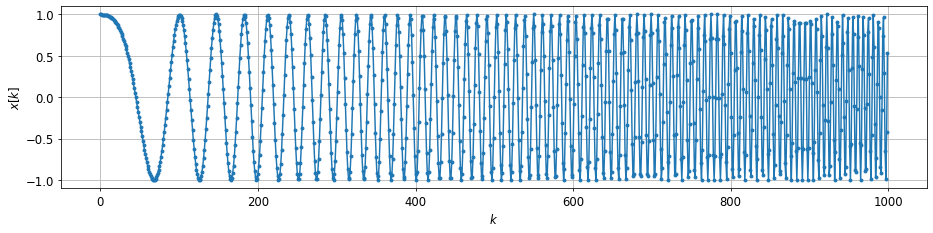

In [47]:
plt.figure(figsize=[13.5, 3.5], dpi=70)
plt.plot(np.arange(x.size), x, '.-')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

### STFT без перекрытия

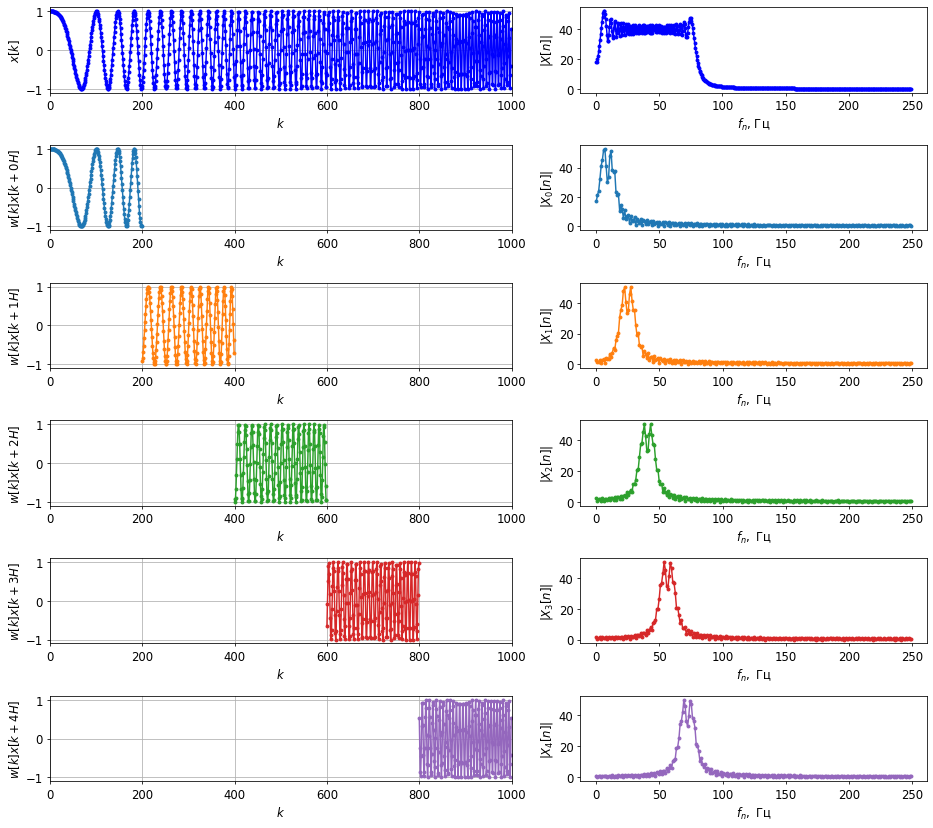

In [48]:
plt.figure(figsize=[13.5, 12], dpi=70)
nseg=5
nperseg=200
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

* `window=('boxcar')` Тип окна - прямоугольное.
* `nperseg=200` Размер окна (сегмента) $M=200$.
* `noverlap=0` Перекрытие $L=0$.
*` nfft=200` Размерность ДПФ $N_\text{FFT}=200$.

606
[[1 2]
 [1 2]]
[[3 3]
 [4 4]]


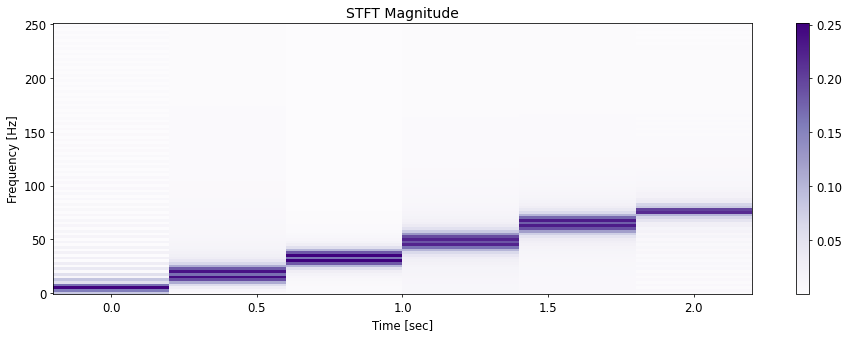

In [49]:
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=200, noverlap=0, nfft=200)
print(np.size(Zxx))
plt.figure(figsize=[13.5, 5], dpi=70)
a = np.array([1, 2])
b = np.array([3, 4])
v, u = np.meshgrid(a, b)
c = np.array([[1, 2],[3, 4]])
print(v)
print(u)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('Purples'))#, shading='flat')
# plt.pcolormesh(v, u, c, cmap=plt.get_cmap('Purples'))

plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

In [50]:
print(np.size(f))
print(np.size(t))
print(np.size(Zxx, 0))
print(np.size(Zxx, 1))

101
6
101
6


### STFT с перекрытием

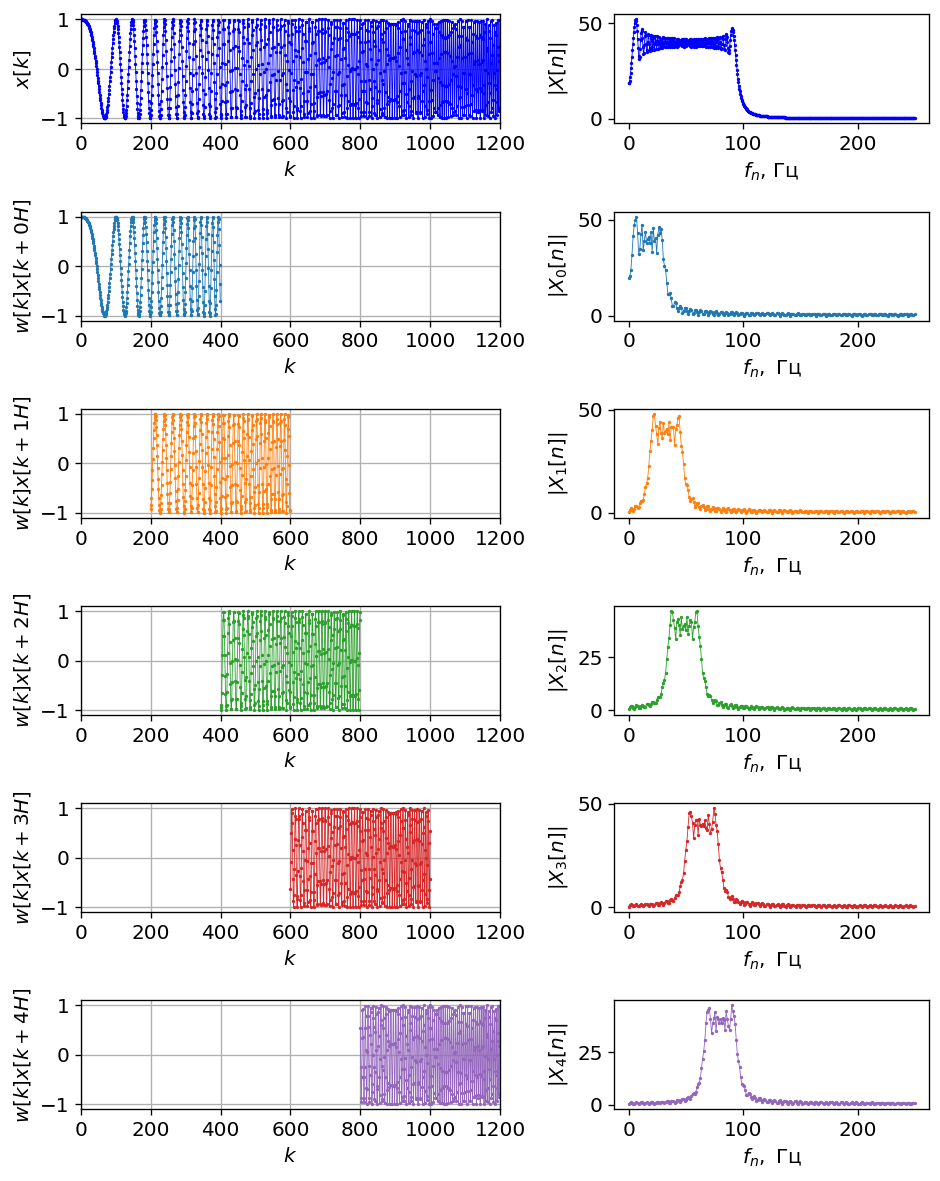

In [51]:
plt.figure(figsize=[8, 10], dpi=120)
fs=500
f0=1
f1=80
t=np.arange(0, 2.4, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

nseg=5
nperseg=400
noverlap=200
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])
linewidth=0.5
ms=2
plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b', linewidth=0.5, ms=ms)
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', linewidth=linewidth, ms=ms)
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u, linewidth=linewidth, ms=ms)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u, linewidth=linewidth, ms=ms)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

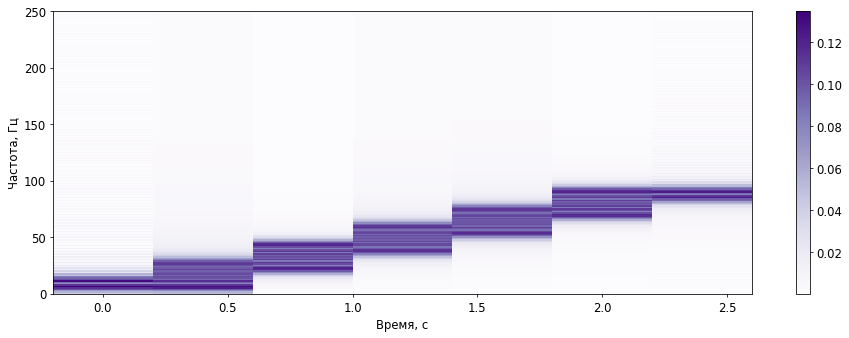

In [52]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=400, noverlap=200, nfft=400)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('Purples'))#, shading='flat')
#plt.xlim([0.25, 1.4])
#plt.ylim([20, 50])
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
#plt.ylim((20, 60))
plt.tight_layout()

Разрешение по времени для STFT равно длине единичного сдвига окна в секундах, т.е. $R/{{f}_{\text{s}}}$. 

Разрешение по частоте обусловлено двумя параметрами.

* Сеткой частот ДПФ $\Delta f={{f}_{\text{s}}}/{{N}_{\text{FFT}}}$, где ${{N}_{\text{FFT}}}$— размерность ДПФ. Это разрешение можно улучшить без изменения длины кадра — путем добавления нулевых отсчетов. 

* Шириной главного лепестка оконной функции. Как правило, этот параметр зависит от длины окна $M.$



## Разрешение STFT по времени и по частоте.

In [53]:
fs, x = wavfile.read('./dataset/vibraphone2.wav')
fs

44100

In [54]:
x

array([-118, -202, -379, ...,   -2,   -1,    0], dtype=int16)

In [55]:
import sounddevice as sd
import soundfile as sf
samples, Fs = sf.read("./dataset/vibraphone2.wav")
sd.play(samples, Fs)

Рассмотрим влияние длины окна $M$ на результат анализа.

$R=M-L$, где $M$ — длина окна, $L$ — число точек в перекрытии

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


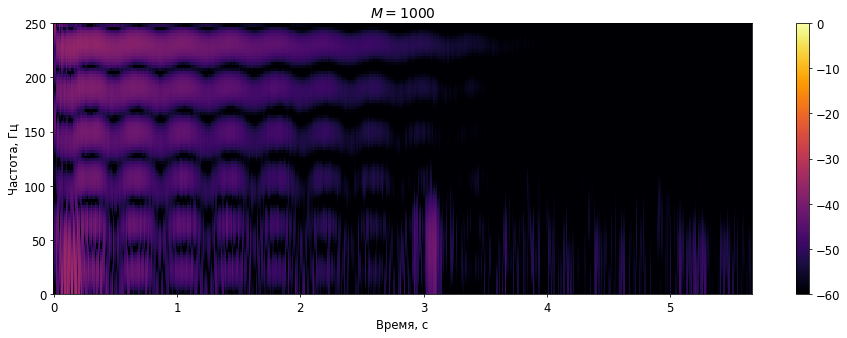

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


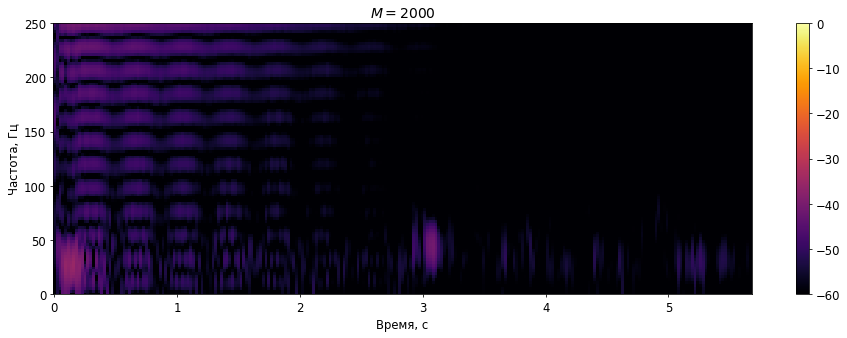

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


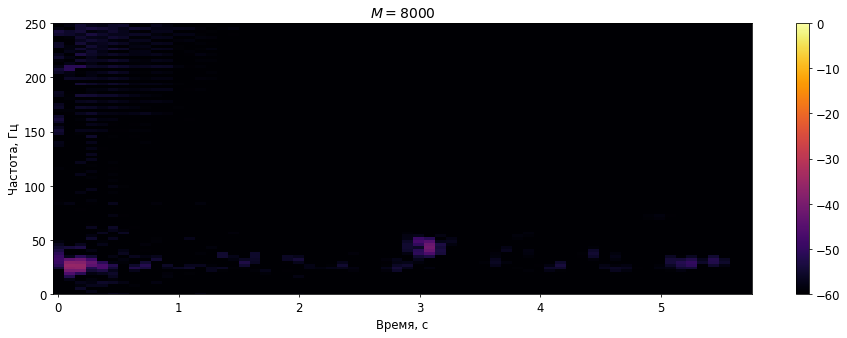

In [56]:
for nperseg in [1000, 2000, 8000]:
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('kaiser', 4), nperseg=nperseg, noverlap=noverlap, nfft=max(2**14, nperseg))
    plt.figure(figsize=[13.5, 5], num='R = %i' % (nperseg-noverlap), dpi=70)
    plt.title('$M = $%i' % nperseg)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'))#, shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

Теперь рассмотрим, как размерность ДПФ влияет на сетку частот. 

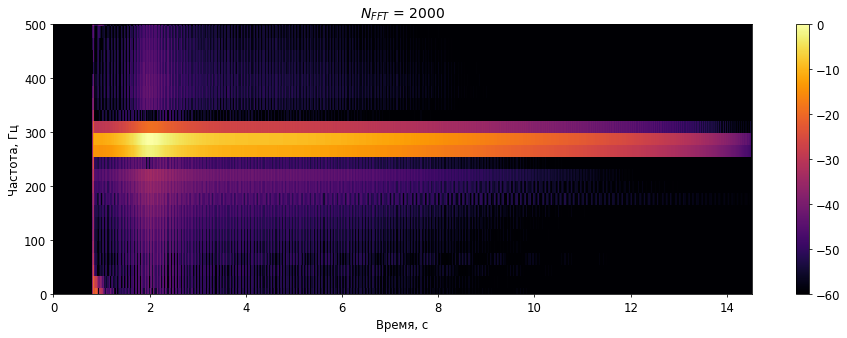

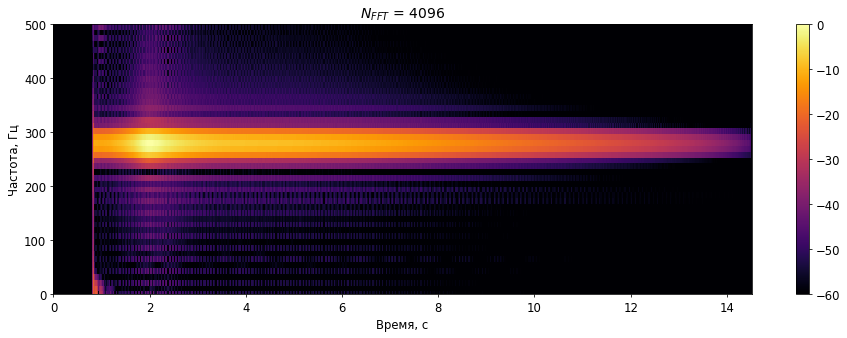

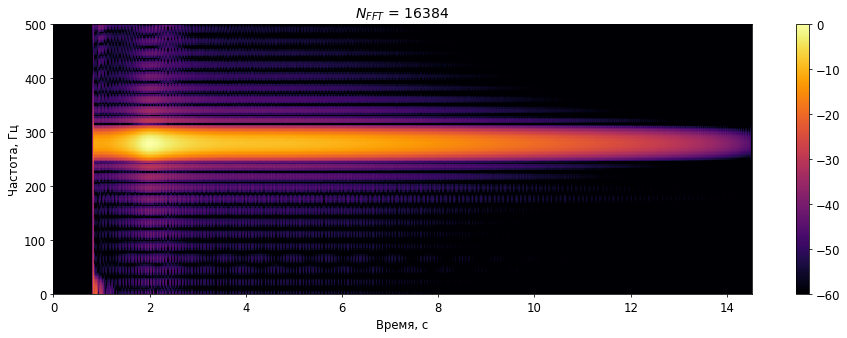

In [75]:
for nfft in [2000, 2**12, 2**14]:
    nperseg=2000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('kaiser', 4), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
    plt.figure(figsize=[13.5, 5], num='nfft = %i' % (nfft), dpi=70)
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='auto')
    plt.colorbar()
    plt.ylim((0, 500))
    #plt.ylim((100, 200))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

In [58]:
fs/4096

10.7666015625

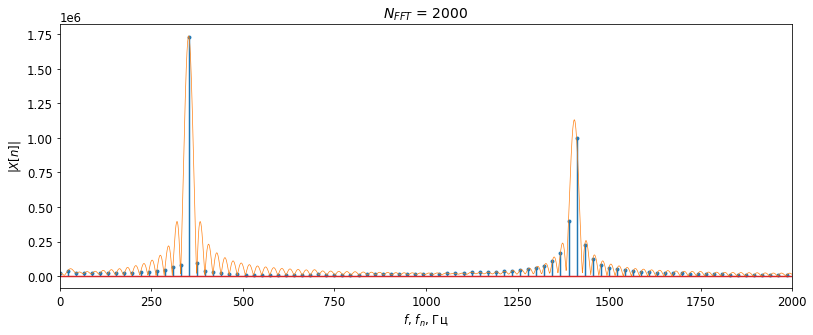

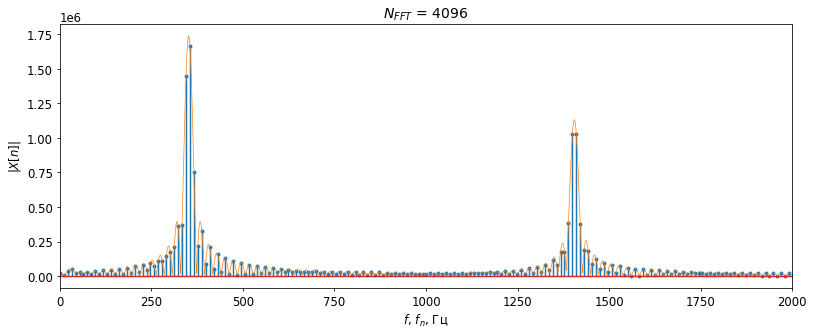

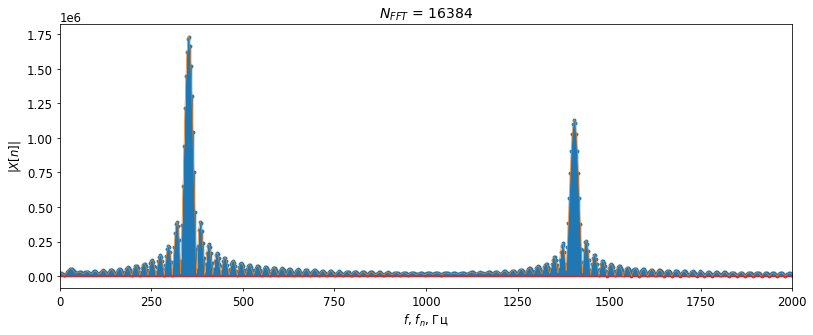

In [59]:
y=x[6000:8000]
for nfft in [2000, 2**12, 2**14]:
    plt.figure(figsize=[13.5, 5], num='nfft  =  %i' % (nfft), dpi=70)
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.stem(fs*(np.arange(nfft)/nfft-0.5), abs(np.fft.fftshift(np.fft.fft(y, nfft))), 'C0', 'C0.')
    nfft2=2**17
    plt.plot(fs*(np.arange(nfft2)/nfft2-0.5), abs(np.fft.fftshift(np.fft.fft(y, nfft2))), 'C1-', linewidth=0.7)
#     plt.plot(fs*np.arange(nfft2)/nfft2-0.5, abs(np.fft.fftshift(np.fft.fft(y, nfft2))), 'C0.-')
    plt.xlim([0, 2000])
    plt.xlabel('$f,\, f_n$, Гц')
    plt.ylabel('$|X[n]|$')
    plt.show()
#     plt.ylim([0, 2000])

В заключении рассмотрим, как выбор оконной функции влияет на результат анализа. 

In [60]:
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        количество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соответствующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))

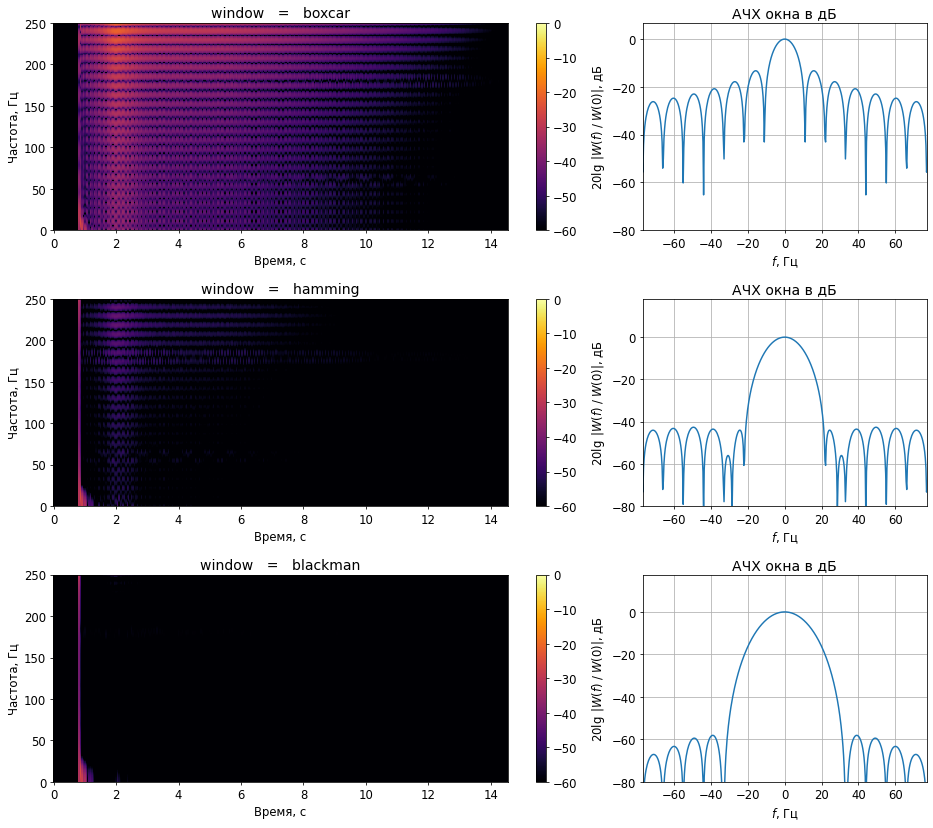

In [74]:
windows=['boxcar', 'hamming', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))
    
    nperseg=4000
#     noverlap=nperseg*2//3
    noverlap=nperseg//2


    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='auto')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    nu, Wn = DTFT(w, M=2**17)
    plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()
    u+=1
    


* тестирование выбора параметра `noverlap` — Constant OverLap Add (COLA) `scipy.signal.check_COLA`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.check_COLA.html
* обратимость STFT — Nonzero Overlap Add (NOLA) `scipy.signal.check_NOLA`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.check_NOLA.html
* вычисление обратного STFT `scipy.signal.istft`   https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.istft.html 


##  Свойство COLA (Constant OverLap-Add)

Кратковременное дискретное преобразование Фурье (Discrete  STFT, англ. Discrete Short-time Fourier transform) может задаваться формулой
$${{X}_{m}}[n]=\sum\limits_{k=mR}^{mR+M-1}{x}[k]w[k-mR]\exp \left( -j2\pi \frac{nk}{{{N}_{\text{FFT}}}} \right),$$
где 
* $w[k]$ — временное окно, 
* $m$ — порядковый номер кадра, 
* $M$ — длина окна (кадра), 
* ${{N}_{\text{FFT}}}$ – размерность ДПФ, 
* $R=M-L$ – единичный сдвиг окна, 
* $L$ — размер перекрытия. 

Тестирование выбора параметра `noverlap` — Constant OverLap Add (COLA) `scipy.signal.check_COLA`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.check_COLA.html

По опредлению, окно $w[k]$ обладает свойством COLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]=1\ \forall k\in \mathbf{Z}$ 



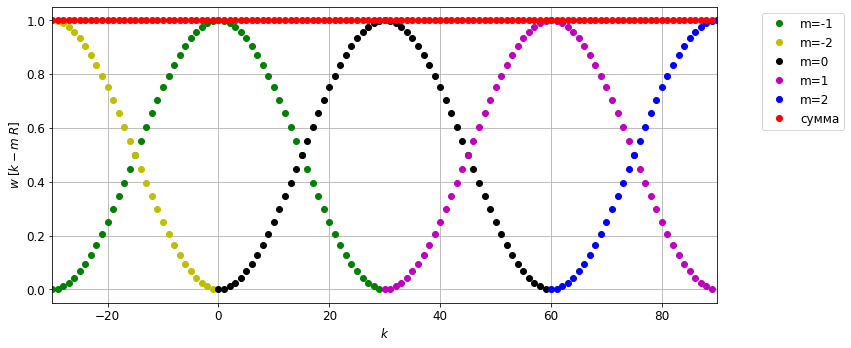

In [ ]:
#@title COLA

#plt.rc('font', size=16) 
N=60
w=signal.hann(N, sym=False)

plt.figure(figsize=[12, 5])
k=np.arange(-N//2, N//2, 1)
plt.plot(k, w, 'og', label="m=-1")
k=np.arange(-N, 0, 1)
plt.plot(k, w, 'oy', label="m=-2")
k=np.arange(0, N, 1)
plt.plot(k, w, 'ok', label="m=0")
k=np.arange(N//2, 3*N//2, 1)
plt.plot(k, w, 'om', label="m=1")


k=np.arange(N, 2*N, 1)
plt.plot(k, w, 'ob', label="m=2")
k=np.arange(-30, 90, 1)
x=np.ones(len(k))
plt.plot(k,x, 'or', label='сумма')
plt.ylabel('$w\;[k-m\;R]$')
plt.xlabel('$k$')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlim([-30, 90])
plt.tight_layout()

Если окно опладает свойством COLA(R), то

$\begin{align}
  & \underset{m=-\infty }{\overset{\infty }{\mathop \sum }}\,{{X}_{m}}[n]=\underset{m=-\infty }{\overset{\infty }{\mathop \sum }}\,\ \underset{k=-\infty }{\overset{\infty }{\mathop \sum }}\,x[k]w[k-mR]\exp \text{ }\!\!~\!\!\text{ }\left( \text{ }\!\!~\!\!\text{ }-j2\pi \text{ }\!\!~\!\!\text{ }\frac{nk}{{{N}_{\text{FFT}}}}\text{ }\!\!~\!\!\text{ } \right)= \\ 
 & =\underset{k=-\infty }{\overset{\infty }{\mathop \sum }}\,\ \underset{m=-\infty }{\overset{\infty }{\mathop \sum }}\,x[k]w[k-mR]\exp \text{ }\!\!~\!\!\text{ }\left( \text{ }\!\!~\!\!\text{ }-j2\pi \text{ }\!\!~\!\!\text{ }\frac{nk}{{{N}_{\text{FFT}}}}\text{ }\!\!~\!\!\text{ } \right)= \\ 
 & =\underset{k=-\infty }{\overset{\infty }{\mathop \sum }}\,x[k]\exp \text{ }\!\!~\!\!\text{ }\left( \text{ }\!\!~\!\!\text{ }-j2\pi \text{ }\!\!~\!\!\text{ }\frac{nk}{{{N}_{\text{FFT}}}}\text{ }\!\!~\!\!\text{ } \right)\underset{m=-\infty }{\overset{\infty }{\mathop \sum }}\,w[k-mR]=\underset{k=-\infty }{\overset{\infty }{\mathop \sum }}\,x[k]\exp \text{ }\!\!~\!\!\text{ }\left( \text{ }\!\!~\!\!\text{ }-j2\pi \text{ }\!\!~\!\!\text{ }\frac{nk}{{{N}_{\text{FFT}}}}\text{ }\!\!~\!\!\text{ } \right)=X[n]\  \\ 
\end{align}$


Т.е. сумма ДПФ по всему интервалу равна ДПФ всего сигнала

Some examples of windows that satisfy COLA:

* Rectangular window at overlap of 0, 1/2, 2/3, 3/4, …

* Bartlett window at overlap of 1/2, 3/4, 5/6, …

* Hann window at 1/2, 2/3, 3/4, …

* Any Blackman family window at 2/3 overlap

* Any window with noverlap = nperseg-1

scipy.signal.check_COLA(window, nperseg, noverlap, tol=1e-10)

In [ ]:
from scipy import signal
signal.check_COLA(window=signal.windows.hann(120, sym=False), nperseg=120, noverlap=60)

In [63]:
signal.check_COLA(window=signal.windows.hann(120, sym=False), nperseg=120, noverlap=64)

False

Если условие COLA  выполнено, то  STFT обратимо. 

## Свойство NOLA (Nonzero Overlap Add)

По опредлению, окно $w[k]$ обладает свойством NOLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]^2 \neq 0\ \forall k\in \mathbf{Z}$

* Необходимо для обратимости STFT.

`scipy.signal.check_NOLA`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.check_NOLA.html

In [64]:
signal.check_NOLA(window=signal.windows.hann(120, sym=False), nperseg=120, noverlap=64)

True

In [65]:
signal.check_NOLA(window=signal.windows.hann(120, sym=True), nperseg=120, noverlap=1)

False

## Пример. vibraphone-loop-1.wav

In [70]:
fs, x = wavfile.read('./dataset/guitar.wav')
# x=x[:, 1]
x

array([ -37,  -31,  -37, ..., -118, -124, -131], dtype=int16)

In [72]:
from IPython.display import Audio
sd.play(x, fs)

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


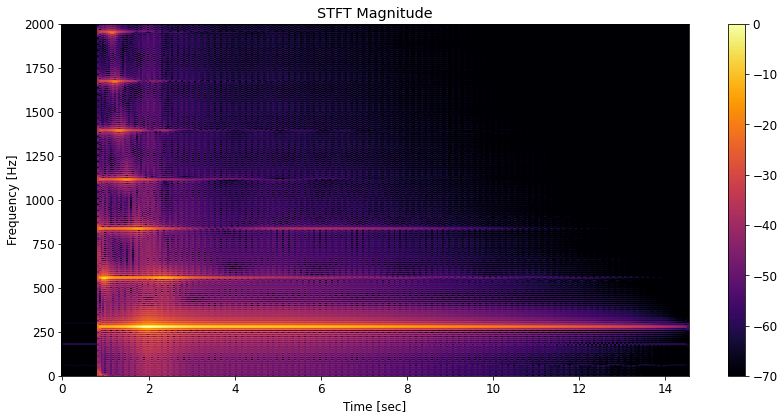

In [73]:
plt.figure(figsize=[12, 6])
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=4000, noverlap=None, nfft=2**15)
#plt.subplots(figsize=[9, 4])
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-70, cmap=plt.get_cmap('inferno'), shading='auto')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()

# Список литературы
* Цифровая обработка сигналов / А. Оппенгейм, Р. Шафер ; пер. с англ. под ред. С. Ф. Боева .— 3-е изд., испр. — М. : Техносфера, 2019 .— 1048 с. 
* https://docs.scipy.org/doc/scipy/reference/signal.html
* MOOC: Digital Signal Processing - EPFL https://www.coursera.org/learn/dsp (доступ к видеоматериалам свободный - необходимо нажать "прослушать курс" без оформления подписки). 